In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("project10.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [7]:
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.describe(include="object")

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [15]:
print("categories of gender variable:",end=" ")
print(df["gender"].unique())

categories of gender variable: ['female' 'male']


In [16]:
print("categories of race/ethnicity variable:",end=" ")
print(df["race/ethnicity"].unique())

categories of race/ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']


In [17]:
print("categories of parental level of education variable:",end=" ")
print(df["parental level of education"].unique())

categories of parental level of education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [18]:
print("categories of lunch variable:",end=" ")
print(df["lunch"].unique())

categories of lunch variable: ['standard' 'free/reduced']


In [19]:
print("categories of test preparation course variable:",end=" ")
print(df["test preparation course"].unique())

categories of test preparation course variable: ['none' 'completed']


In [20]:
for i in df.columns:
        print(i)
        print("_"*10)
        print(df[i].unique())
        print("_"*50)

gender
__________
['female' 'male']
__________________________________________________
race/ethnicity
__________
['group B' 'group C' 'group A' 'group D' 'group E']
__________________________________________________
parental level of education
__________
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
__________________________________________________
lunch
__________
['standard' 'free/reduced']
__________________________________________________
test preparation course
__________
['none' 'completed']
__________________________________________________
math score
__________
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
_____________________________

In [21]:
numerical_features=[i  for i in df.columns  if df[i].dtypes != "O"]

In [22]:
print(numerical_features)

['math score', 'reading score', 'writing score']


In [23]:
categorical_features=[i  for i in df.columns   if df[i].dtypes =="O"]

In [24]:
print(categorical_features)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [25]:
print("we have",len(numerical_features)," numberical feartures {}".format(numerical_features))

we have 3  numberical feartures ['math score', 'reading score', 'writing score']


In [26]:
print("we have {} numerical features {}".format(len(numerical_features),numerical_features))

we have 3 numerical features ['math score', 'reading score', 'writing score']


In [27]:
print("we have {} categorical features namely {}".format(len(categorical_features),categorical_features))

we have 5 categorical features namely ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
df["total_score"]=df["reading score"]+df["math score"]+df["writing score"]

In [30]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [31]:
df["average"]=df.apply(lambda x:x["total_score"]/3,axis=1)

In [32]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [33]:
df.query("`math score` == 100")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
451,female,group E,some college,standard,none,100,92,97,289,96.333333
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
623,male,group A,some college,standard,completed,100,96,86,282,94.000000
625,male,group D,some college,standard,completed,100,97,99,296,98.666667
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000


In [34]:
df.query("`reading score` == 100")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
106,female,group D,master's degree,standard,none,87,100,100,287,95.666667
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000
381,male,group C,associate's degree,standard,completed,87,100,95,282,94.000000
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
546,female,group A,some high school,standard,completed,92,100,97,289,96.333333
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,292,97.333333
594,female,group C,bachelor's degree,standard,completed,92,100,99,291,97.000000


In [35]:
df.query("`writing score` == 100")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
106,female,group D,master's degree,standard,none,87,100,100,287,95.666667
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000
377,female,group D,master's degree,free/reduced,completed,85,95,100,280,93.333333
403,female,group D,high school,standard,completed,88,99,100,287,95.666667
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100,292,97.333333
685,female,group E,master's degree,standard,completed,94,99,100,293,97.666667
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,97.666667


In [36]:
df.query("`total_score` == 300")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.0
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.0
962,female,group E,associate's degree,standard,none,100,100,100,300,100.0


In [37]:
df.query("`math score`==100 | `reading score` == 100 | `writing score` == 100")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
106,female,group D,master's degree,standard,none,87,100,100,287,95.666667
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000
377,female,group D,master's degree,free/reduced,completed,85,95,100,280,93.333333
381,male,group C,associate's degree,standard,completed,87,100,95,282,94.000000
403,female,group D,high school,standard,completed,88,99,100,287,95.666667
451,female,group E,some college,standard,none,100,92,97,289,96.333333
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000


In [38]:
df.query("average >=90")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
104,male,group C,some college,standard,completed,98,86,90,274,91.333333
106,female,group D,master's degree,standard,none,87,100,100,287,95.666667
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
121,male,group B,associate's degree,standard,completed,91,89,92,272,90.666667
122,female,group C,some college,standard,completed,88,93,93,274,91.333333
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000


In [39]:
df.query("average >=90").shape

(52, 10)

In [40]:
df.query("average >=90")["average"].count()

52

In [41]:
df.loc[df["math score"]==100]["average"].count()

7

In [42]:
df.loc[df["average"]>=90]["total_score"].count()

52

In [43]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [44]:
math_marks_full=df[df["math score"]==100]["average"].count()

In [45]:
print(math_marks_full)

7


In [46]:
writing_marks_full=df[df["writing score"]==100]["average"].count()

In [47]:
print(writing_marks_full)

14


In [48]:
reading_marks_full=df[df["reading score"]==100]["average"].count()

In [49]:
print(reading_marks_full)

17


In [50]:
print(f"number of students with full marks in maths:{math_marks_full}")

number of students with full marks in maths:7


In [51]:
print(f"number of students with full marks in reading:{reading_marks_full}")

number of students with full marks in reading:17


In [52]:
print(f"number of students with full marks in writing:{writing_marks_full}")

number of students with full marks in writing:14


In [53]:
total_students=len(df)

In [54]:
total_students

1000

In [55]:
percentage_math_full=(math_marks_full/1000)*100

In [56]:
percentage_math_full

0.7000000000000001

In [57]:
percentage_read_full=(reading_marks_full/total_students)*100

In [58]:
percentage_read_full

1.7000000000000002

In [59]:
percentage_write_full=(writing_marks_full/total_students)*100

In [60]:
percentage_write_full

1.4000000000000001

In [61]:
print(f"the percentage of students with full marks in math:{percentage_math_full:.2f}%")

the percentage of students with full marks in math:0.70%


In [62]:
print(f"the percentage of students with full marks in read:{percentage_read_full:.2f}%")

the percentage of students with full marks in read:1.70%


In [63]:
print(f"the percentage of students with full marks in write:{percentage_write_full:.2f}%")

the percentage of students with full marks in write:1.40%


In [64]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [65]:
df.query("`math score`<=35")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
55,female,group C,high school,free/reduced,none,33,41,43,117,39.000000
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
76,male,group E,some high school,standard,none,30,26,22,78,26.000000
91,male,group C,high school,free/reduced,none,27,34,36,97,32.333333
145,female,group C,some college,free/reduced,none,22,39,33,94,31.333333
211,male,group C,some college,free/reduced,none,35,28,27,90,30.000000
217,female,group C,high school,free/reduced,none,34,42,39,115,38.333333
327,male,group A,some college,free/reduced,none,28,23,19,70,23.333333
338,female,group B,some high school,free/reduced,none,24,38,27,89,29.666667


In [66]:
print("math fail students:",df.query("`math score`<=35")["reading score"].count())

math fail students: 27


In [67]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [68]:
df.query("`reading score`<=35")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
76,male,group E,some high school,standard,none,30,26,22,78,26.000000
91,male,group C,high school,free/reduced,none,27,34,36,97,32.333333
211,male,group C,some college,free/reduced,none,35,28,27,90,30.000000
327,male,group A,some college,free/reduced,none,28,23,19,70,23.333333
363,female,group D,some high school,free/reduced,none,27,34,32,93,31.000000
466,female,group D,associate's degree,free/reduced,none,26,31,38,95,31.666667
596,male,group B,high school,free/reduced,none,30,24,15,69,23.000000
601,female,group C,high school,standard,none,29,29,30,88,29.333333


In [69]:
print(f"the number of students fail in reading:{df.query("`reading score`<=35")["lunch"].count()}")

the number of students fail in reading:15


In [70]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [71]:
df.query("`writing score`<=35")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
61,male,group A,some high school,free/reduced,none,39,39,34,112,37.333333
76,male,group E,some high school,standard,none,30,26,22,78,26.000000
84,male,group D,high school,free/reduced,none,42,39,34,115,38.333333
145,female,group C,some college,free/reduced,none,22,39,33,94,31.333333
211,male,group C,some college,free/reduced,none,35,28,27,90,30.000000
327,male,group A,some college,free/reduced,none,28,23,19,70,23.333333
331,male,group C,associate's degree,standard,none,47,37,35,119,39.666667
338,female,group B,some high school,free/reduced,none,24,38,27,89,29.666667


In [72]:
print("no of students fail in writing:",df.loc[df["writing score"]<=35]["average"].count())

no of students fail in writing: 18


In [73]:
df.query("average <=35")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
76,male,group E,some high school,standard,none,30,26,22,78,26.000000
91,male,group C,high school,free/reduced,none,27,34,36,97,32.333333
145,female,group C,some college,free/reduced,none,22,39,33,94,31.333333
211,male,group C,some college,free/reduced,none,35,28,27,90,30.000000
327,male,group A,some college,free/reduced,none,28,23,19,70,23.333333
338,female,group B,some high school,free/reduced,none,24,38,27,89,29.666667
363,female,group D,some high school,free/reduced,none,27,34,32,93,31.000000
466,female,group D,associate's degree,free/reduced,none,26,31,38,95,31.666667


In [74]:
print("the no of students fail totally:",df[df["average"]<=35]["average"].count())

the no of students fail totally: 18


In [75]:
reading_less_20=df[df["reading score"]<=20]["reading score"].count()

In [76]:
reading_less_20

1

In [77]:
writing_less_20=df.loc[df["writing score"]<=20]["writing score"].count()

In [78]:
writing_less_20

3

In [79]:
math_less_20=df.query("`math score`<=20")["math score"].count()

In [80]:
math_less_20

4

In [81]:
print(f"the number of students with less and equalto 20 marks in maths:{math_less_20}")

the number of students with less and equalto 20 marks in maths:4


In [82]:
print(f"the number of students with less and equalto 20 marks in reading:{reading_less_20}")

the number of students with less and equalto 20 marks in reading:1


In [83]:
print(f"the number of students with less and equalto 20 marks in writing:{writing_less_20}")

the number of students with less and equalto 20 marks in writing:3


In [84]:
total_students=len(df)

In [85]:
total_students

1000

In [86]:
percentage_math_less_20=(math_less_20/total_students)*100

In [87]:
percentage_math_less_20

0.4

In [88]:
percentage_reading_less_20=(reading_less_20/total_students)*100

In [89]:
percentage_reading_less_20

0.1

In [90]:
percentage_writing_less_20=(writing_less_20/total_students)*100

In [91]:
percentage_writing_less_20

0.3

In [92]:
print(f"percentage of students with less than or equal to 20 marks in math:{percentage_math_less_20:.2f}%")

percentage of students with less than or equal to 20 marks in math:0.40%


In [93]:
print(f"percentage of students with less than or equal to 20 marks in reading:{percentage_reading_less_20:.2f}%")

percentage of students with less than or equal to 20 marks in reading:0.10%


In [94]:
print(f"percentage of students with less than or equal to 20 marks in writing:{percentage_writing_less_20:.2f}%")

percentage of students with less than or equal to 20 marks in writing:0.30%


In [95]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


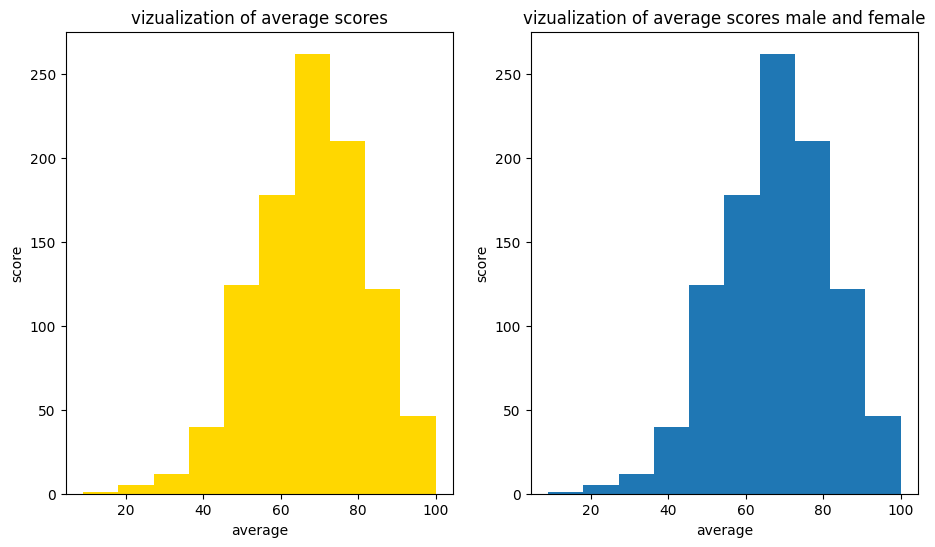

In [96]:
fig,ax=plt.subplots(1,2,figsize=(11,6))
plt.subplot(121)
plt.hist(df["average"],color="gold")
plt.xlabel("average")
plt.ylabel("score")
plt.title("vizualization of average scores")
plt.subplot(122)
plt.hist(df["average"])
plt.xlabel("average")
plt.ylabel("score")
plt.title("vizualization of average scores male and female")
plt.show()


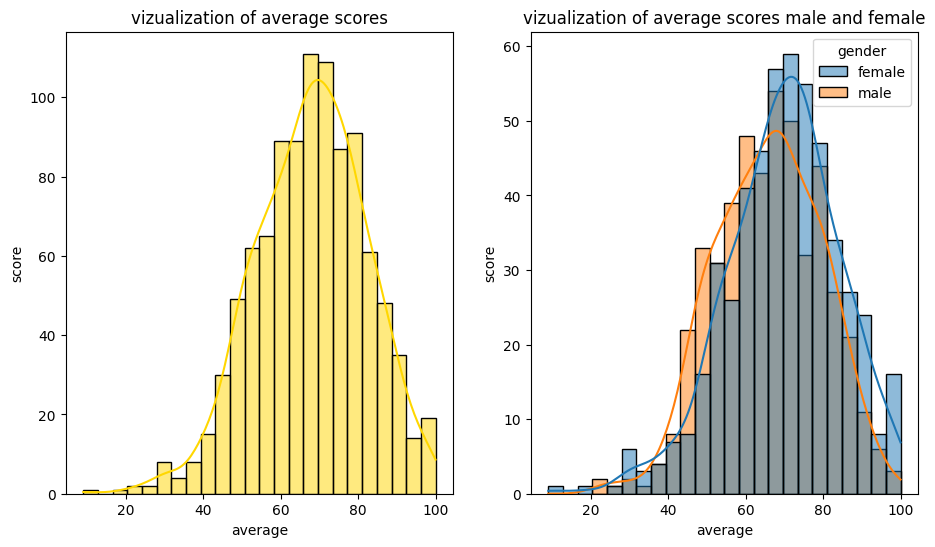

In [97]:
fig,ax=plt.subplots(1,2,figsize=(11,6))
plt.subplot(121)
sns.histplot(df["average"],kde=True,color="gold")
plt.xlabel("average")
plt.ylabel("score")
plt.title("vizualization of average scores")
plt.subplot(122)
sns.histplot(data=df,x="average",hue="gender",kde=True)
plt.xlabel("average")
plt.ylabel("score")
plt.title("vizualization of average scores male and female")
plt.show()

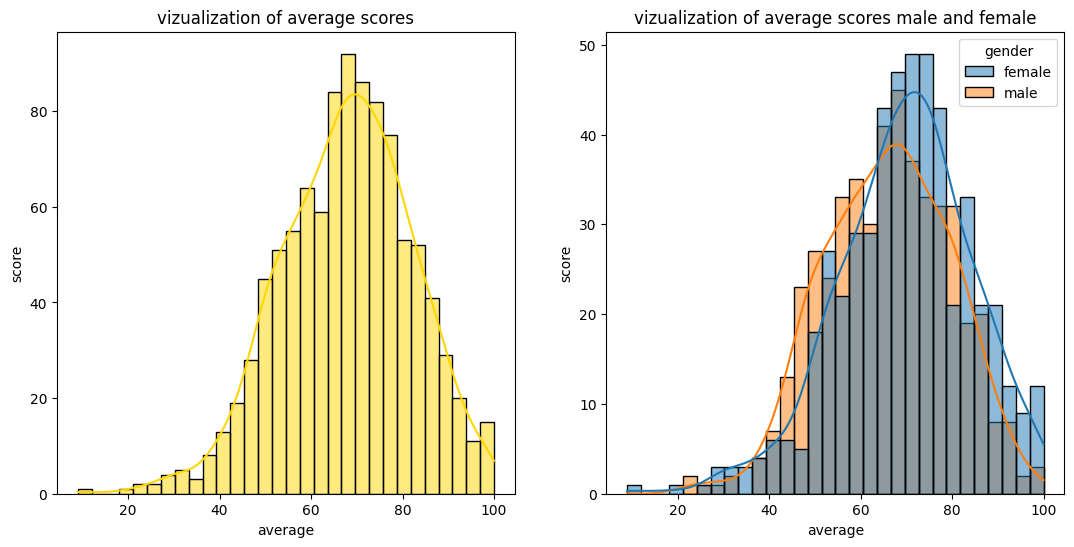

In [98]:
fig,ax=plt.subplots(1,2,figsize=(13,6))
plt.subplot(121)
sns.histplot(df["average"],kde=True,color="gold",bins=30)
plt.xlabel("average")
plt.ylabel("score")
plt.title("vizualization of average scores")
plt.subplot(122)
sns.histplot(data=df,x="average",hue="gender",kde=True,bins=30)
plt.xlabel("average")
plt.ylabel("score")
plt.title("vizualization of average scores male and female")
plt.show()

In [99]:
df.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
852,female,group E,some college,standard,none,87,85,93,265,88.333333


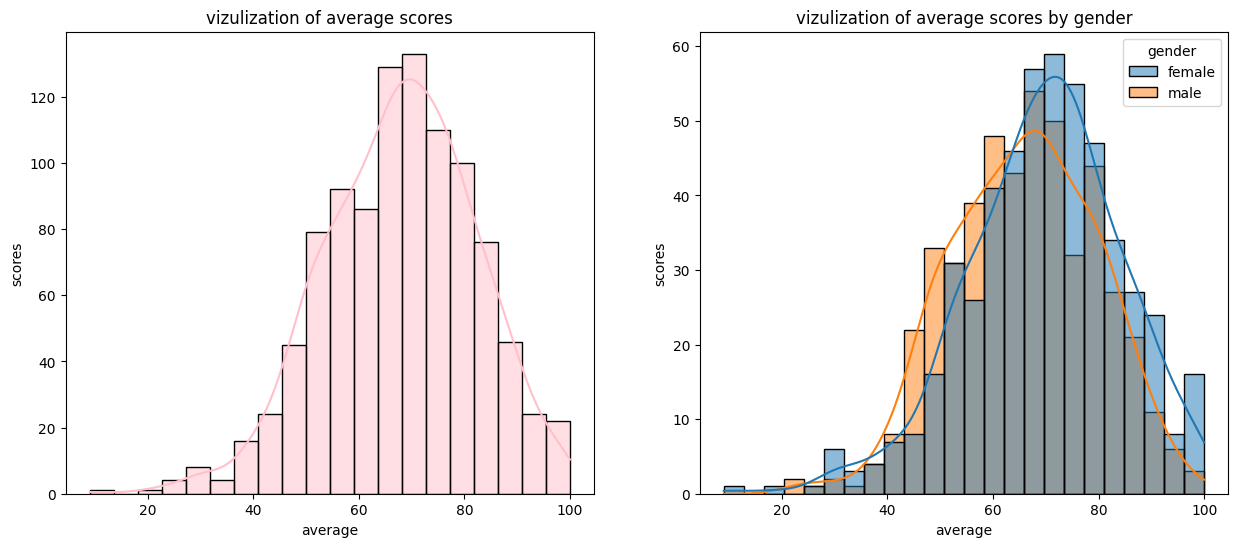

In [100]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=20,kde=True,color="pink")
plt.xlabel("average")
plt.ylabel("scores")
plt.title("vizulization of average scores")

plt.subplot(122)
sns.histplot(data=df,x="average",hue="gender",kde=True)
plt.xlabel("average")
plt.ylabel("scores")
plt.title("vizulization of average scores by gender")
plt.show()

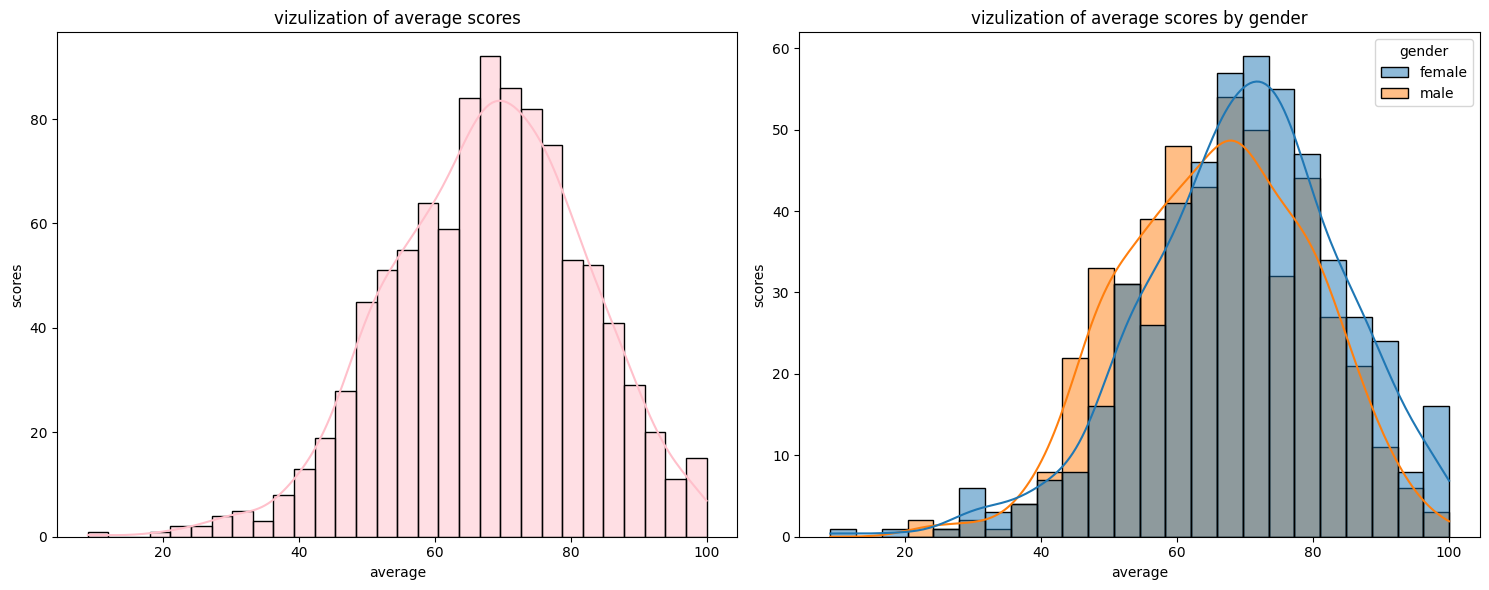

In [101]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color="pink")
plt.xlabel("average")
plt.ylabel("scores")
plt.title("vizulization of average scores")

plt.subplot(122)
sns.histplot(data=df,x="average",hue="gender",kde=True)
plt.xlabel("average")
plt.ylabel("scores")
plt.title("vizulization of average scores by gender")
plt.tight_layout()
plt.show()

In [102]:
df.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667


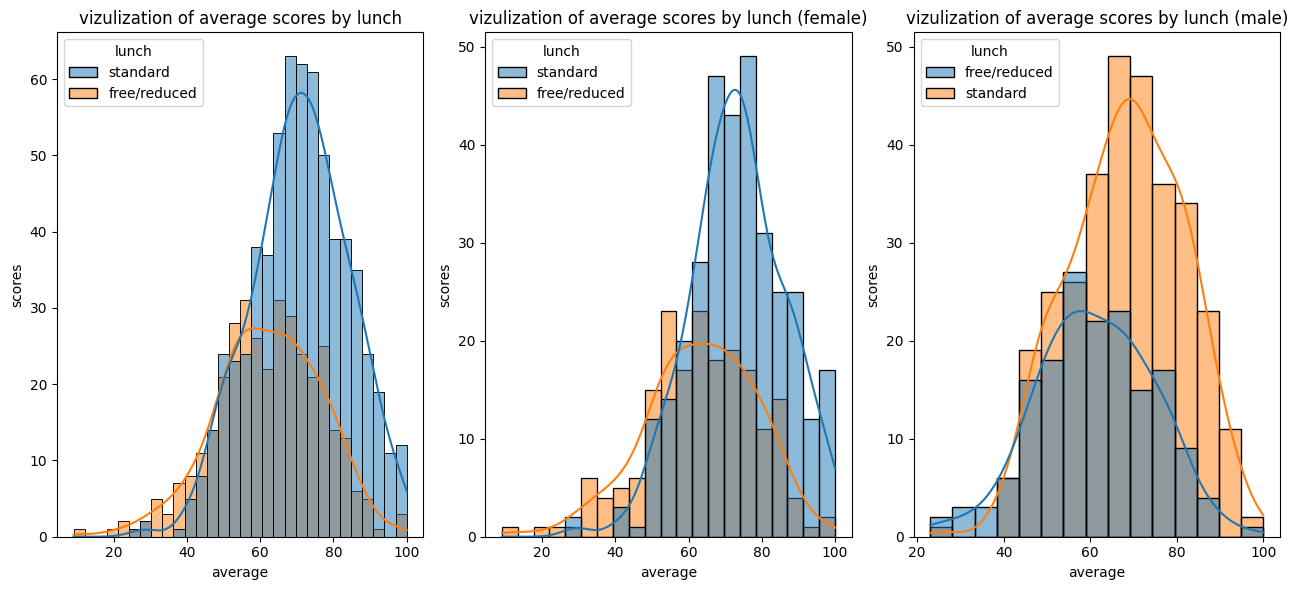

In [103]:
plt.figure(figsize=(13,6))
plt.subplot(131)
sns.histplot(data=df,x="average",bins=30,hue="lunch",kde=True)
plt.xlabel("average")
plt.ylabel("scores")
plt.title("vizulization of average scores by lunch")

plt.subplot(132)
sns.histplot(data=df[df["gender"]=="female"],x="average",hue="lunch",kde=True)

plt.xlabel("average")
plt.ylabel("scores")
plt.title("vizulization of average scores by lunch (female)")

plt.subplot(133)
sns.histplot(data=df[df["gender"]=="male"],x="average",kde=True,hue="lunch")
plt.xlabel("average")
plt.ylabel("scores")
plt.title("vizulization of average scores by lunch (male)")
plt.tight_layout()
plt.show()



In [104]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


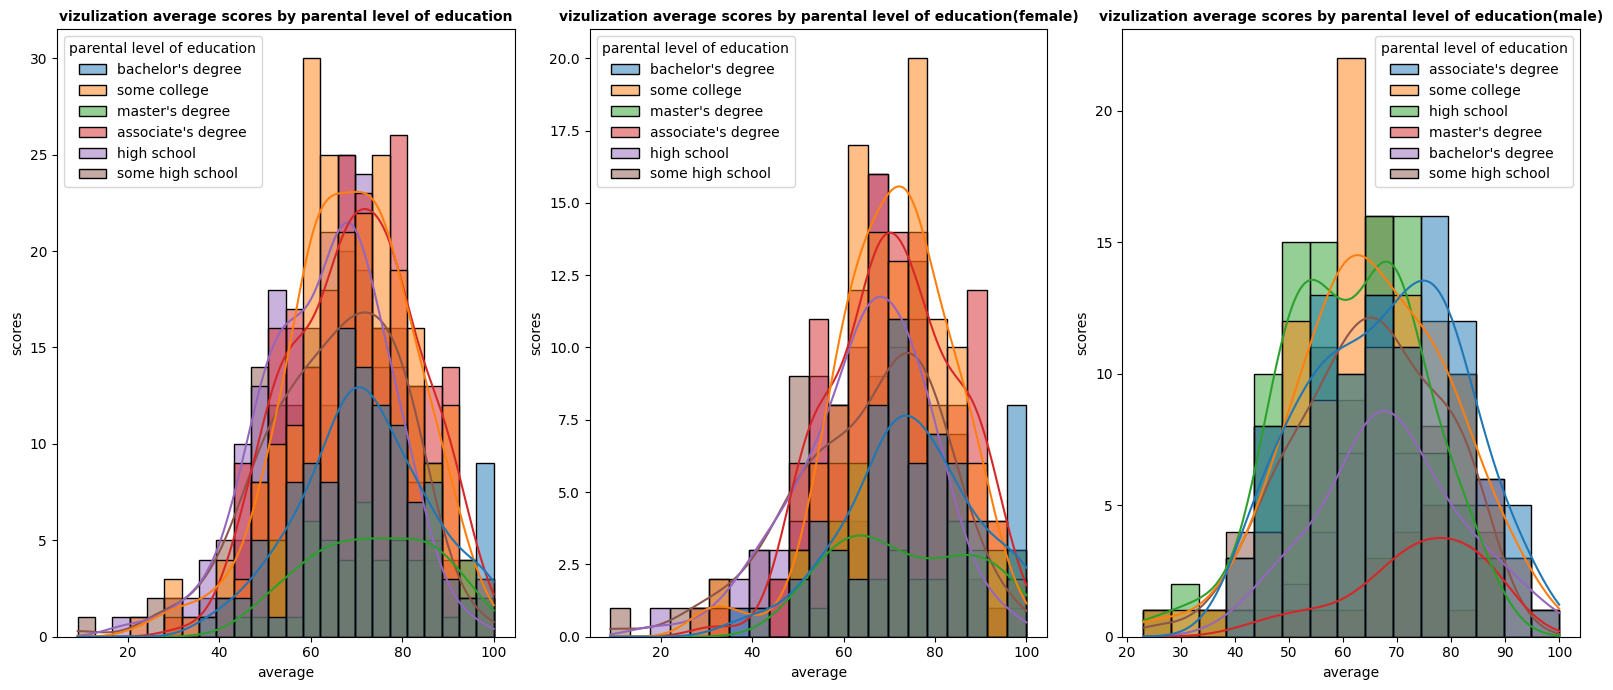

In [105]:
plt.figure(figsize=(16,7))
plt.subplot(131)
sns.histplot(data=df,x="average",hue="parental level of education",kde=True)
plt.xlabel("average")
plt.ylabel("scores")
plt.title("vizulization average scores by parental level of education",fontsize=10,weight="bold")

plt.subplot(132)
sns.histplot(data=df[df["gender"]=="female"],x="average",kde=True,hue="parental level of education")
plt.xlabel("average")
plt.ylabel("scores")
plt.title("vizulization average scores by parental level of education(female)",fontsize=10,weight="bold")

plt.subplot(133)
sns.histplot(data=df[df["gender"]=="male"],x="average",kde=True,hue="parental level of education")
plt.xlabel("average")
plt.ylabel("scores")
plt.title("vizulization average scores by parental level of education(male)",fontsize=10,weight="bold")
plt.tight_layout()
plt.show()


In [106]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


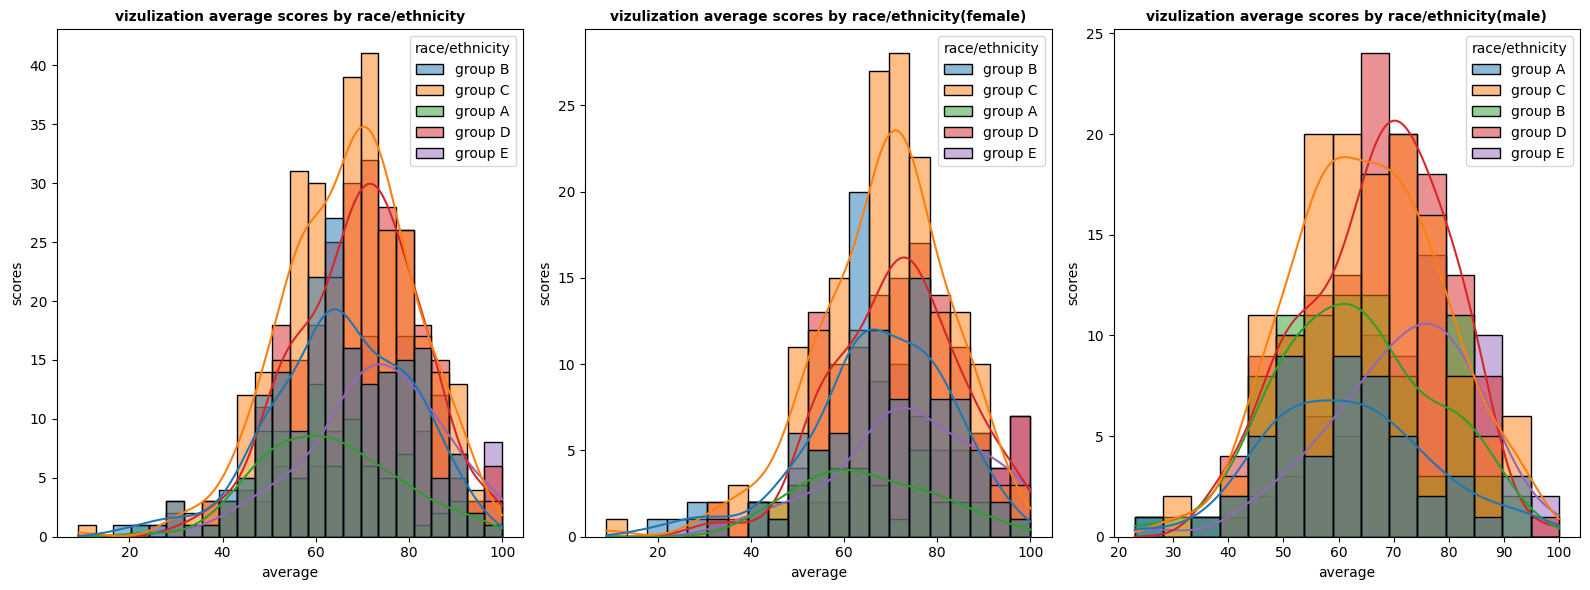

In [107]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="average",hue="race/ethnicity",kde=True)
plt.xlabel("average")
plt.ylabel("scores")
plt.title("vizulization average scores by race/ethnicity",fontsize=10,weight="bold")

plt.subplot(1,3,2)
sns.histplot(data=df[df["gender"]=="female"],x="average",hue="race/ethnicity",kde=True)
plt.xlabel("average")
plt.ylabel("scores")
plt.title("vizulization average scores by race/ethnicity(female)",fontsize=10,weight="bold")

plt.subplot(1,3,3)
sns.histplot(data=df[df["gender"]=="male"],x="average",hue="race/ethnicity",kde="True")
plt.xlabel("average")
plt.ylabel("scores")
plt.title("vizulization average scores by race/ethnicity(male)",fontsize=10,weight="bold")
plt.tight_layout()
plt.show()

In [108]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


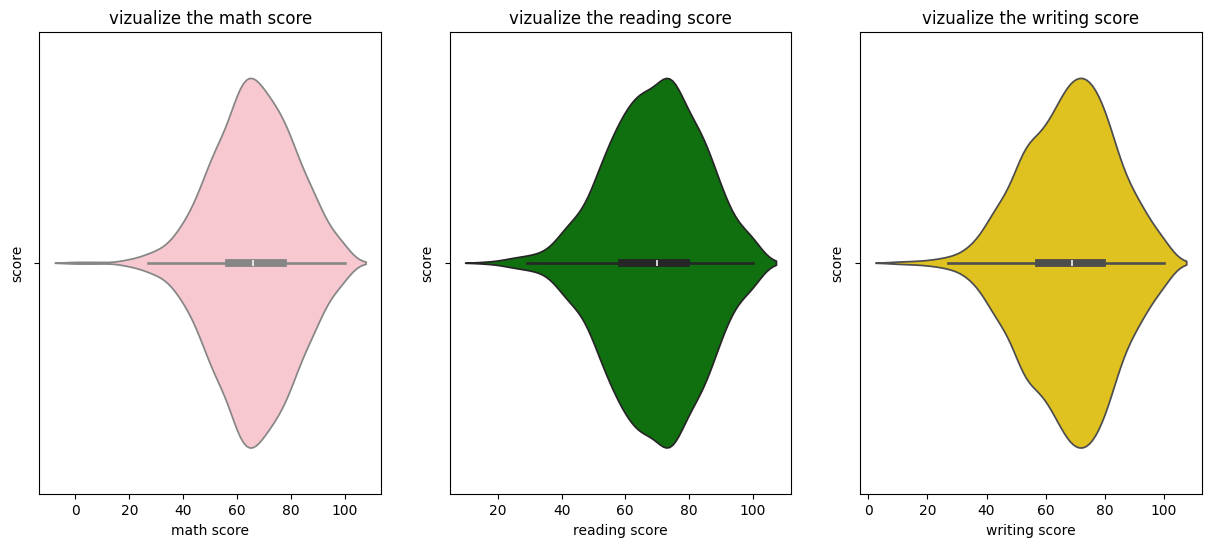

In [109]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.violinplot(data=df,x="math score",color="pink")
plt.xlabel("math score")
plt.ylabel("score")
plt.title("vizualize the math score")
plt.subplot(1,3,2)
sns.violinplot(data=df,x="reading score",color="green")
plt.xlabel("reading score")
plt.ylabel("score")
plt.title("vizualize the reading score")
plt.subplot(1,3,3)
sns.violinplot(data=df,x="writing score",color="gold")
plt.xlabel("writing score")
plt.ylabel("score")
plt.title("vizualize the writing score")
plt.show()


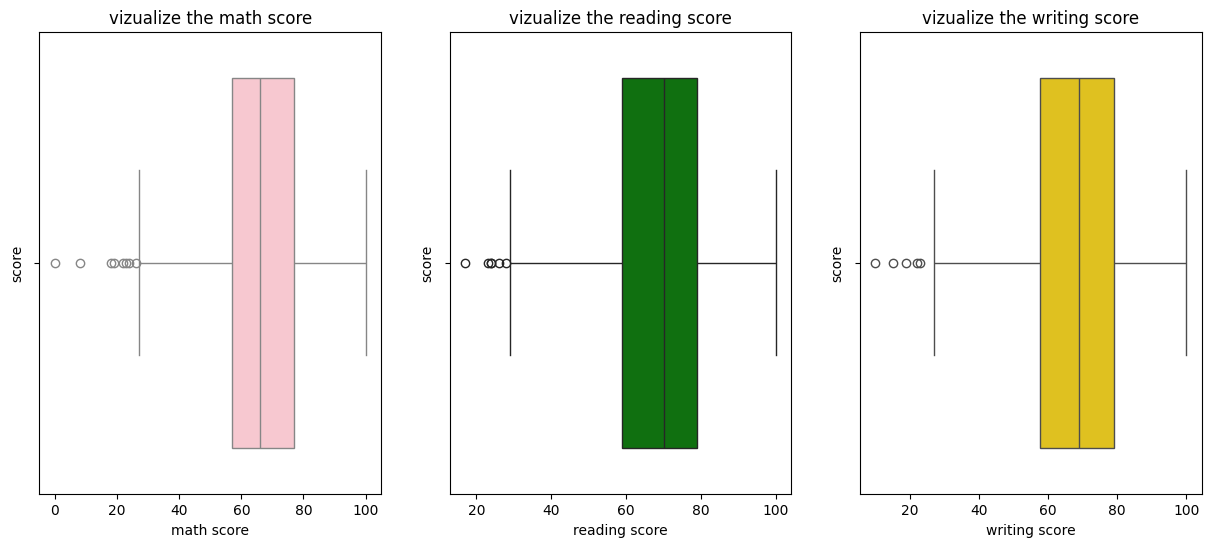

In [110]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(data=df,x="math score",color="pink")
plt.xlabel("math score")
plt.ylabel("score")
plt.title("vizualize the math score")
plt.subplot(1,3,2)
sns.boxplot(data=df,x="reading score",color="green")
plt.xlabel("reading score")
plt.ylabel("score")
plt.title("vizualize the reading score")
plt.subplot(1,3,3)
sns.boxplot(data=df,x="writing score",color="gold")
plt.xlabel("writing score")
plt.ylabel("score")
plt.title("vizualize the writing score")
plt.show()


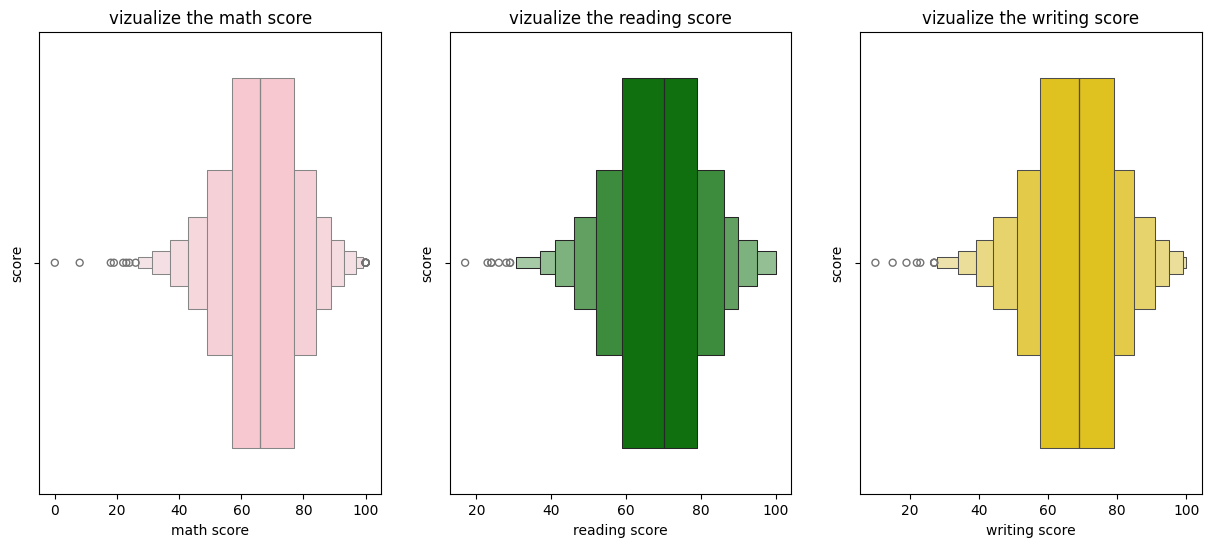

In [111]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxenplot(data=df,x="math score",color="pink")
plt.xlabel("math score")
plt.ylabel("score")
plt.title("vizualize the math score")
plt.subplot(1,3,2)
sns.boxenplot(data=df,x="reading score",color="green")
plt.xlabel("reading score")
plt.ylabel("score")
plt.title("vizualize the reading score")
plt.subplot(1,3,3)
sns.boxenplot(data=df,x="writing score",color="gold")
plt.xlabel("writing score")
plt.ylabel("score")
plt.title("vizualize the writing score")
plt.show()

In [112]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


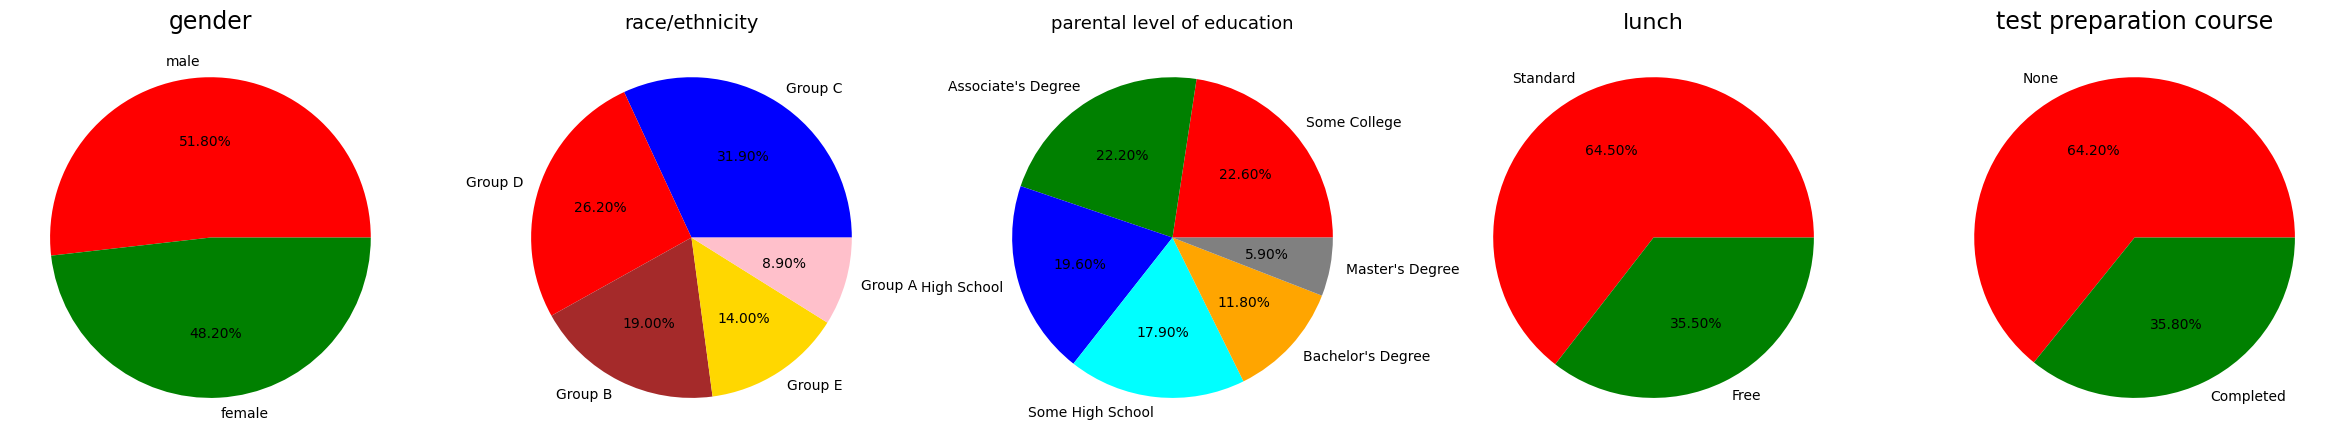

In [119]:
plt.rcParams["figure.figsize"]=(30,12)
plt.subplot(1,5,1)
size=df["gender"].value_counts()
labels="male","female"
color=["red","green"]

plt.pie(size,colors=color,labels=labels,autopct="%.2f%%")
plt.title("gender",fontsize=17)
plt.axis("off")

plt.subplot(1,5,2)
size=df["race/ethnicity"].value_counts()
colors=["blue","red","brown","gold","pink"]
labels=['Group C', 'Group D', 'Group B', 'Group E', 'Group A']

plt.pie(size,colors=colors,labels=labels,autopct="%.2f%%")
plt.title("race/ethnicity",fontsize=14)
plt.axis("off")

plt.subplot(1,5,3)
size=df["parental level of education"].value_counts()
labels=['Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
colors=['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size,colors=colors,labels=labels,autopct="%.2f%%")
plt.title("parental level of education",fontsize=13)
plt.axis("off")

plt.subplot(1,5,4)
size=df["lunch"].value_counts()
labels=['Standard', 'Free']
colors=['red', 'green']

plt.pie(size,labels=labels,colors=colors,autopct="%.2f%%")
plt.title("lunch",fontsize=16)
plt.axis("off")

plt.subplot(1,5,5)
size=df["test preparation course"].value_counts()
labels=['None', 'Completed']
colors=['red', 'green']

plt.pie(size,colors=colors,labels=labels,autopct="%.2f%%")
plt.title("test preparation course",fontsize=17)
plt.axis("off")
plt.show()

In [120]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<function matplotlib.pyplot.show(close=None, block=None)>

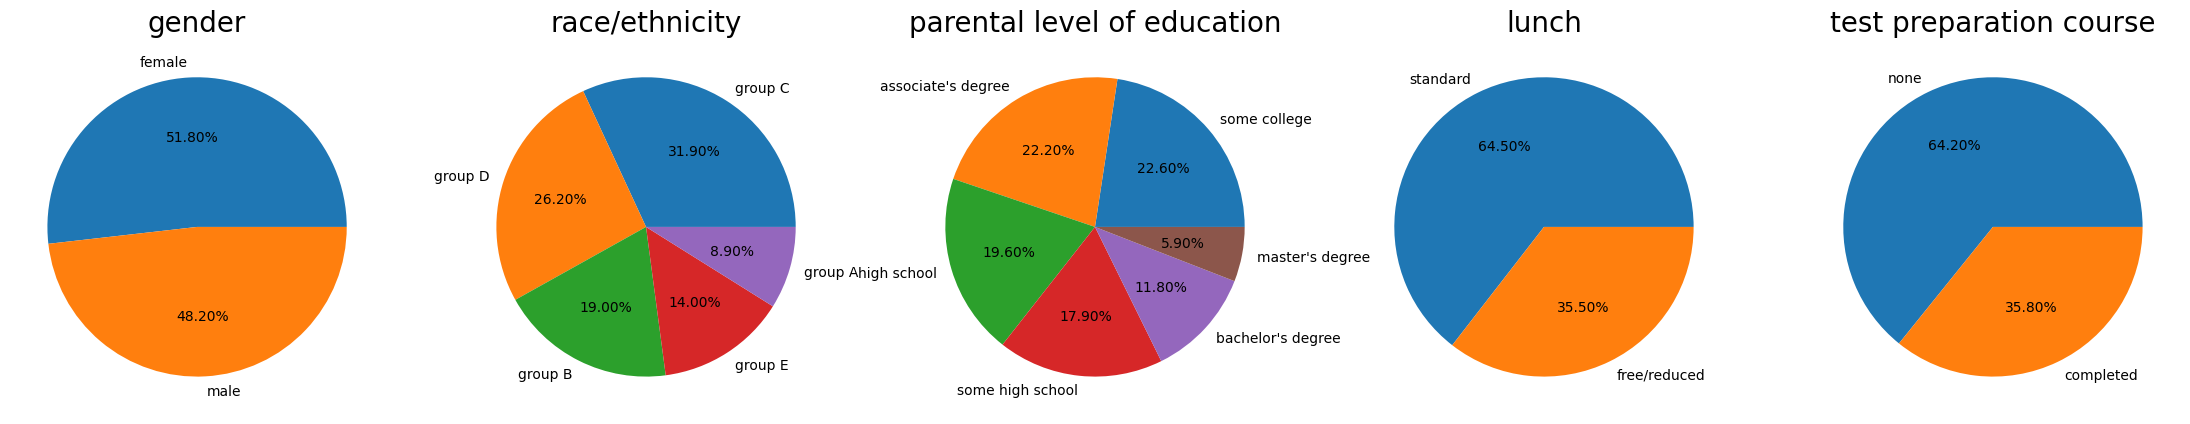

In [129]:
plt.figure(figsize=(28,6))
plt.subplot(1,5,1)
a=df["gender"].value_counts()

plt.pie(a.values,labels=a.index,autopct="%.2f%%")
plt.title("gender",fontsize=20)
plt.axis("off")

plt.subplot(1,5,2)
b=df["race/ethnicity"].value_counts()
plt.pie(b.values,labels=b.index,autopct="%.2f%%")
plt.title("race/ethnicity",fontsize=20)
plt.axis("off")

plt.subplot(1,5,3)
c=df["parental level of education"].value_counts()
plt.pie(c.values,labels=c.index,autopct="%.2f%%")
plt.title("parental level of education",fontsize=20)
plt.axis("off")


plt.subplot(1,5,4)
d=df["lunch"].value_counts()
plt.pie(d.values,labels=d.index,autopct="%.2f%%")
plt.title("lunch",fontsize=20)
plt.axis("off")

plt.subplot(1,5,5)
e=df["test preparation course"].value_counts()
plt.pie(e.values,labels=e.index,autopct="%.2f%%")
plt.title("test preparation course",fontsize=20)
plt.axis("off")



plt.show

In [130]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


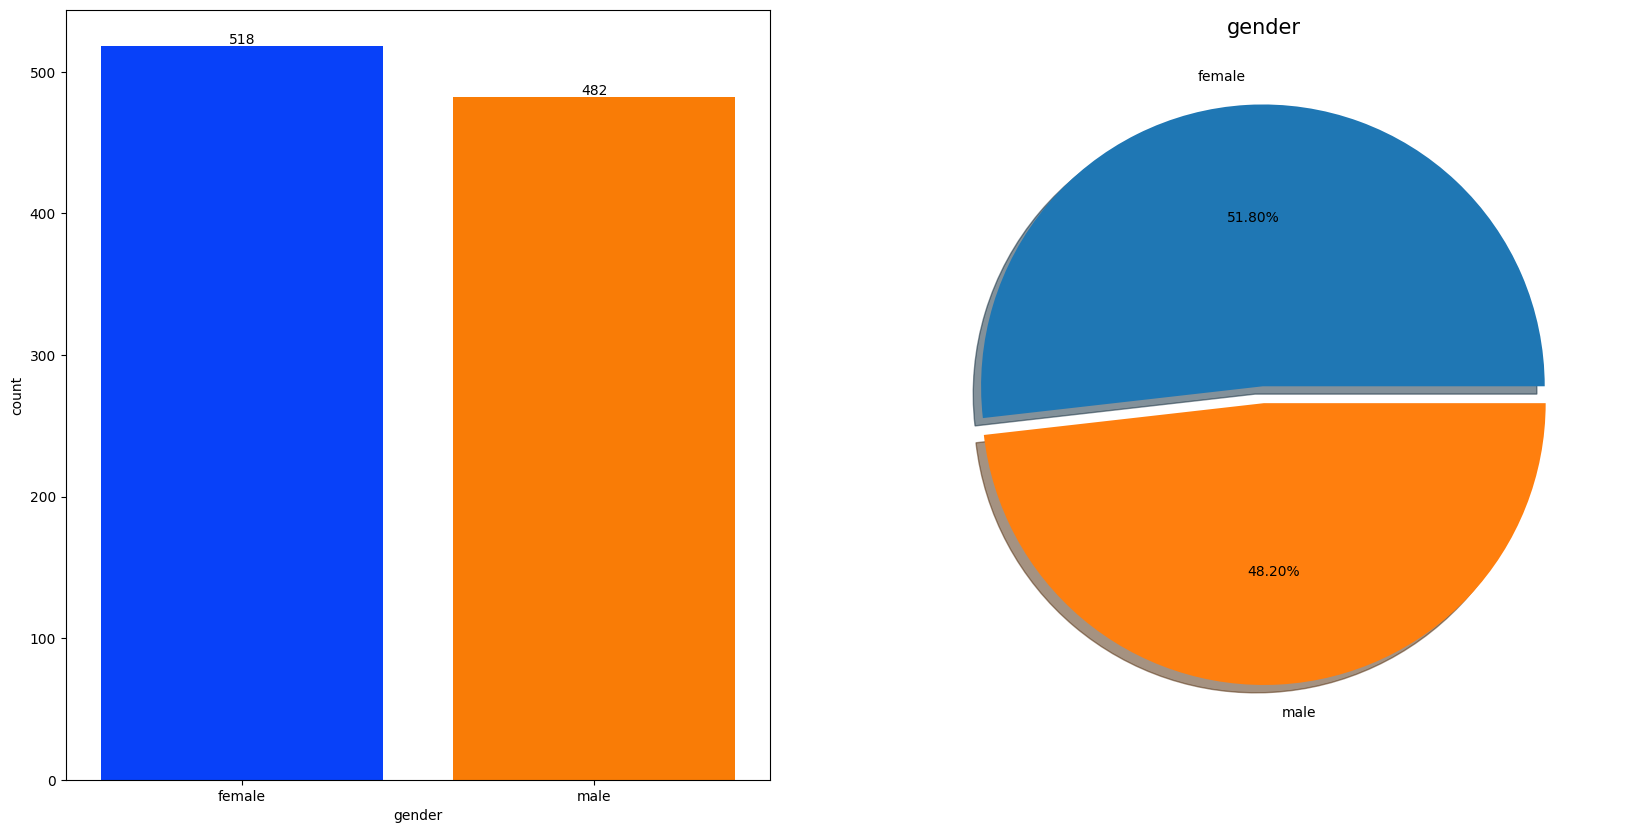

In [143]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot(x=df["gender"],data=df,ax=ax[0],palette="bright",saturation=0.95)
for i in ax[0].containers:
    ax[0].bar_label(i,color="black",size=10)

plt.pie(df["gender"].value_counts(),labels=df["gender"].value_counts().index,autopct="%.2f%%",shadow=True,explode=(0.03,0.03))
plt.title("gender",fontsize=15)
plt.axis("off")

plt.show()

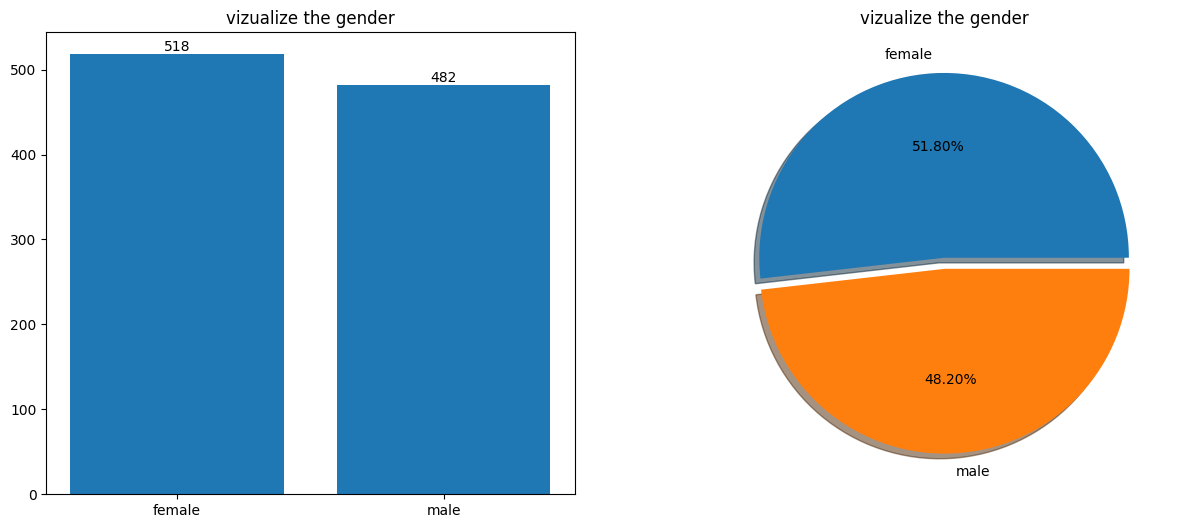

In [153]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.bar(df["gender"].value_counts().index,df["gender"].value_counts())
plt.title("vizualize the gender")
plt.bar_label(plt.gca().containers[0],label_type="edge")

plt.subplot(122)
plt.pie(df["gender"].value_counts(),labels=df["gender"].value_counts().index,shadow=True,explode=(0.03,0.03),autopct="%.2f%%")
plt.title("vizualize the gender")
plt.show()

In [156]:
numerical_columns = df.select_dtypes(include=['number']).columns

In [157]:
print(numerical_columns)

Index(['math score', 'reading score', 'writing score', 'total_score',
       'average'],
      dtype='object')


In [160]:
gender_group=df.groupby(["gender"])[['math score', 'reading score', 'writing score', 'total_score',
       'average']].mean()

In [161]:
gender_group

,math score,reading score,writing score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


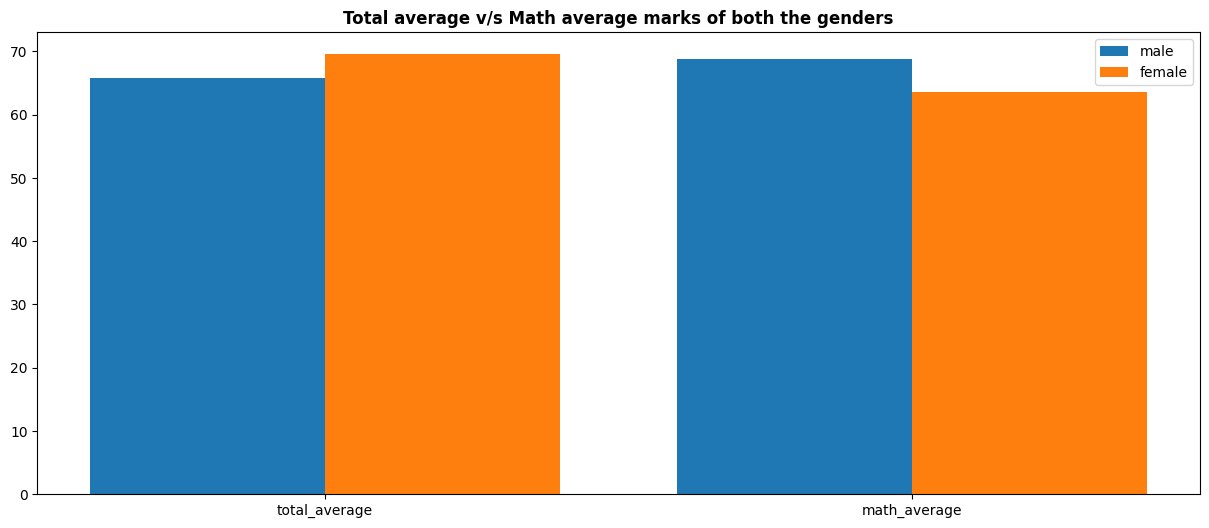

In [164]:
plt.figure(figsize=(15,6))

X=["total_average","math_average"]
female_scores=[gender_group["average"][0],gender_group["math score"][0]]
male_scores=[gender_group["average"][1],gender_group["math score"][1]]

X_axis=np.arange(len(X))

plt.bar(X_axis-0.2,male_scores,0.4,label="male")
plt.bar(X_axis+0.2,female_scores,0.4,label="female")

plt.xticks(X_axis,X)
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

In [169]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


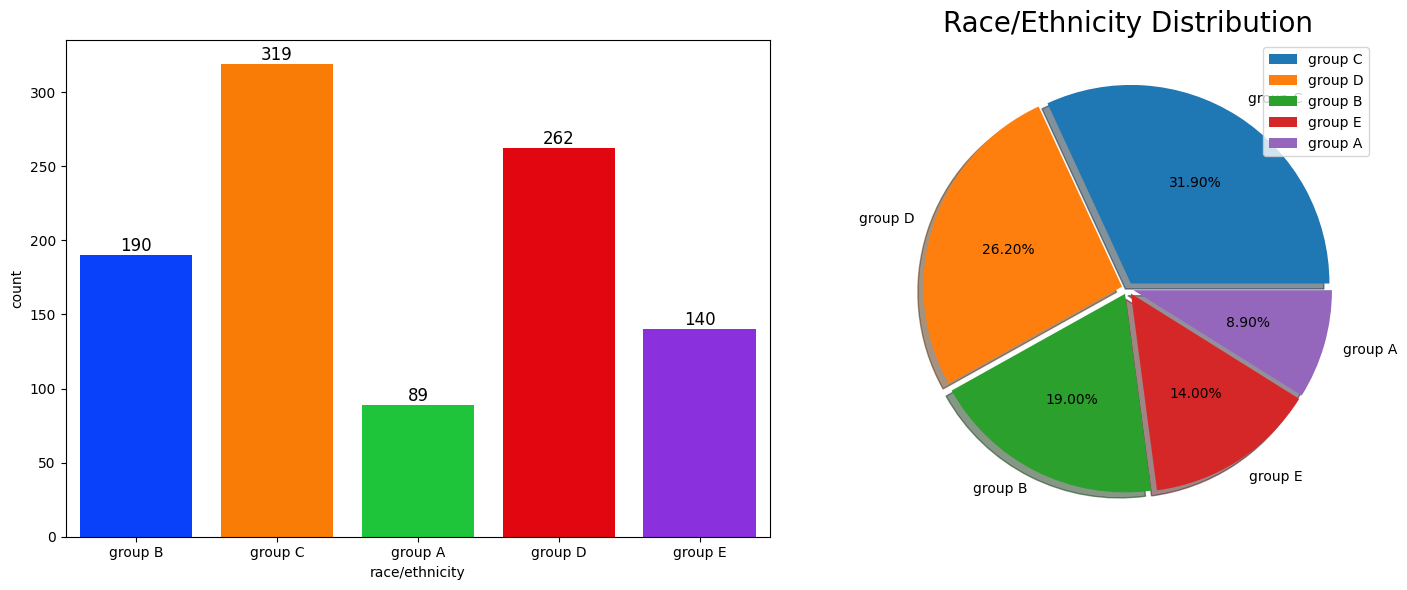

In [178]:
f,ax=plt.subplots(1,2,figsize=(15,6))

sns.countplot(x=df["race/ethnicity"],palette="bright",data=df,ax=ax[0],saturation=0.95)
for i in ax[0].containers:
    ax[0].bar_label(i,size=12)

plt.pie(df["race/ethnicity"].value_counts(),labels=df["race/ethnicity"].value_counts().index,shadow=True,autopct="%.2f%%",explode=(0.03,0.03,0.03,0.03,0.03))
plt.legend()
plt.title("Race/Ethnicity Distribution",fontsize=20)
plt.axis("off")

plt.tight_layout()

plt.show()

In [179]:
group_data2=df.groupby("race/ethnicity")

In [180]:
group_data2

In [184]:
group_data2["math score"].mean()

race/ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math score, dtype: float64

In [182]:
math_palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
reading_palette = ['#ffb3e6', '#8cff66', '#c2f0c2', '#ffcc99', '#ffb366']
writing_palette = ['#66b3ff', '#99ff99', '#ff9999', '#c2c2f0', '#ffcc99']

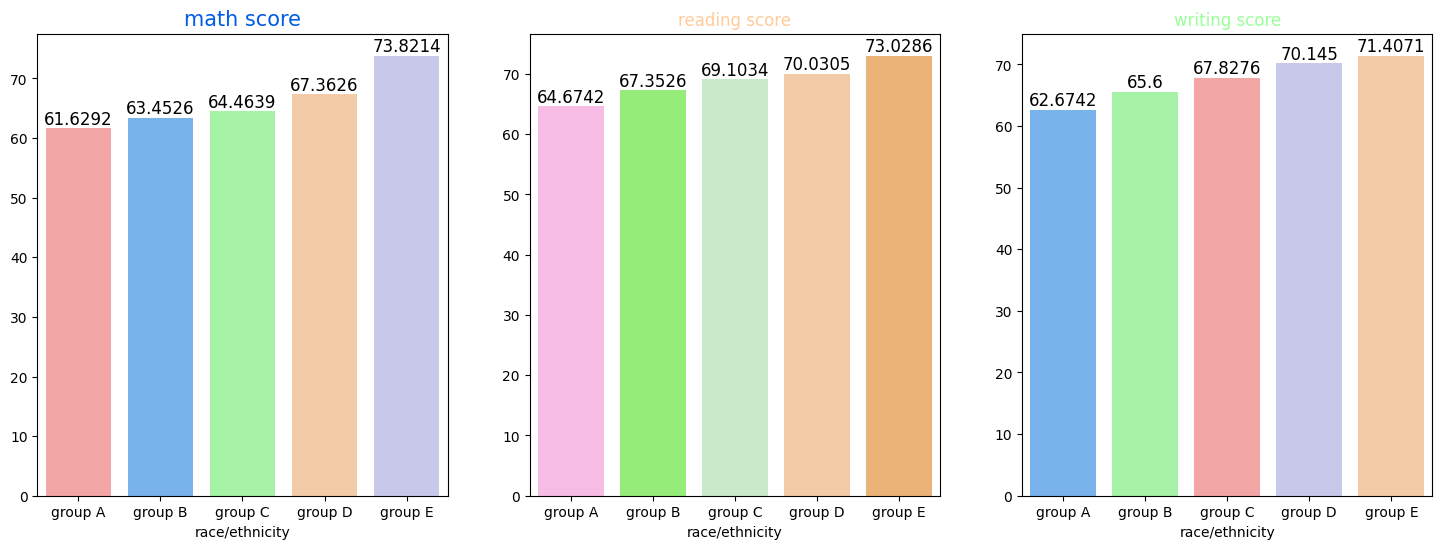

In [201]:
f,ax=plt.subplots(1,3,figsize=(18,6))
sns.barplot(x=group_data2["math score"].mean().index,y=group_data2["math score"].mean().values,palette=math_palette,ax=ax[0])

ax[0].set_title("math score", color='#005ce6',size=15)
for i in ax[0].containers:
    ax[0].bar_label(i,color="black",size=12)

sns.barplot(x=group_data2["reading score"].mean().index,y=group_data2["reading score"].mean().values,palette=reading_palette,ax=ax[1])
ax[1].set_title("reading score",color='#ffcc99',fontsize=12)
for i in ax[1].containers:
    ax[1].bar_label(i,color="black",size=12)

sns.barplot(x=group_data2["writing score"].mean().index,y=group_data2["writing score"].mean().values,palette=writing_palette,ax=ax[2])
ax[2].set_title("writing score",color="#99ff99",fontsize=12)
for i in ax[2].containers:
    ax[2].bar_label(i,color="black",size=12)

plt.show()

In [202]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


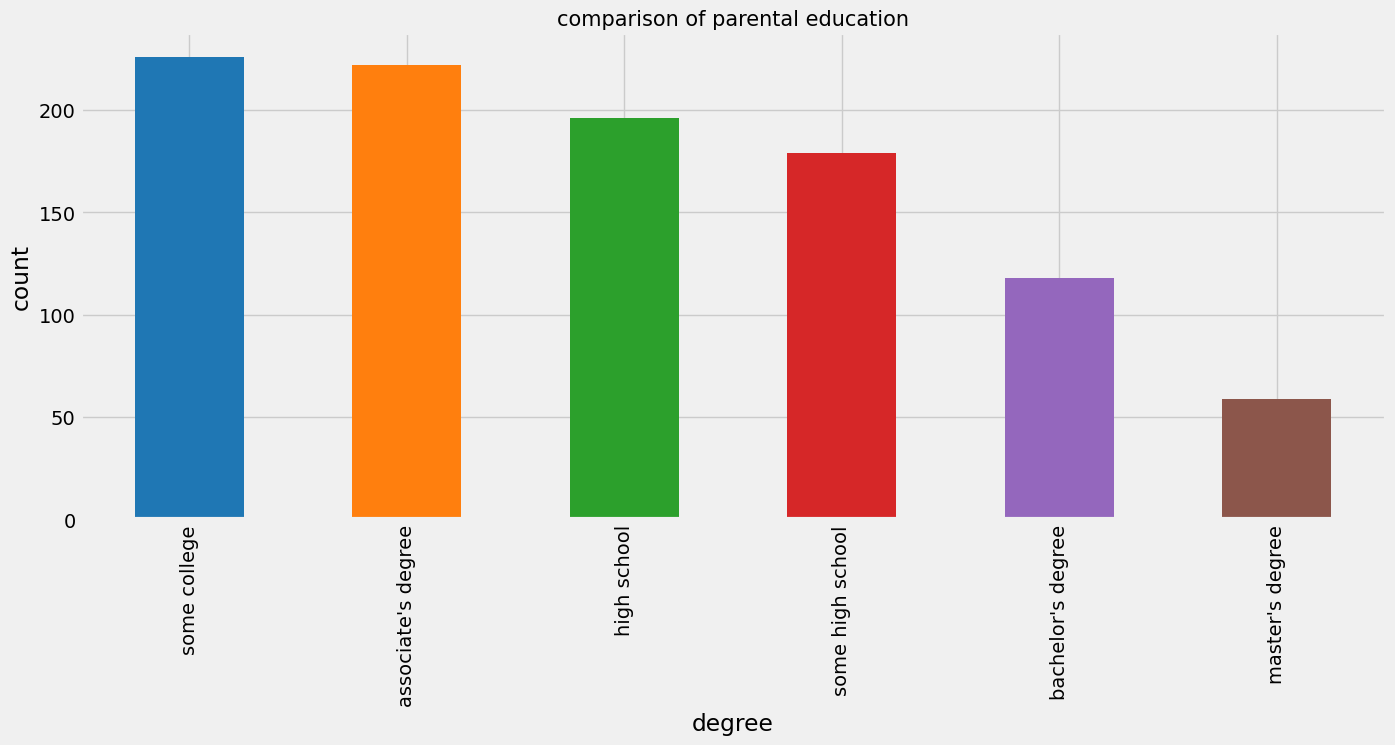

In [208]:
plt.rcParams["figure.figsize"]=(15,6)
plt.style.use("fivethirtyeight")

df["parental level of education"].value_counts().plot(kind="bar",color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.title("comparison of parental education",fontsize=15,fontweight=12)
plt.xlabel("degree")
plt.ylabel("count")
plt.show()
